In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import models

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
model = models.resnet18(pretrained=True)
model = model.to(device)
model.eval()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Get the data at https://drive.google.com/drive/folders/1s7EqyMucJqgNVa23Lx2XvD3bqqEPLKJc?usp=sharing

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
from google.colab.patches import cv2_imshow


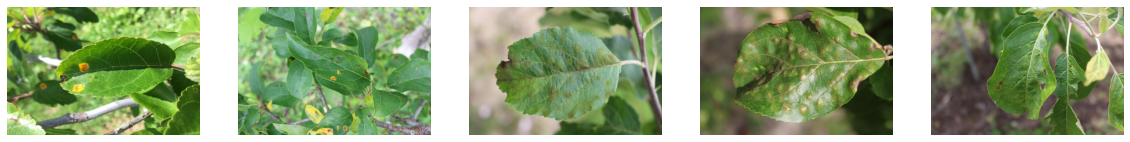

In [ ]:
plt.figure(figsize=(20,20))
for i in range(5):
    path = '/content/gdrive/MyDrive/WiDS Datasets/test/Test_'+str(random.randint(0,1820))+'.jpg'
    image = mpimg.imread(path)
    ax=plt.subplot(1,5,i+1)
    ax.axis('off')
    plt.imshow(image)

In [ ]:
from torchvision import transforms
from PIL import Image

In [ ]:
transform = transforms.Compose([                            
		transforms.Resize(256),
		transforms.CenterCrop(224),
		transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),		
])

image = Image.open(path)

image = transform(image)


In [ ]:
image = image.reshape(1, 3, 224, 224)

In [ ]:
image = image.to(device)
image.requires_grad_()

tensor([[[[ 0.6563,  0.6049,  0.5364,  ...,  0.7933,  0.6563,  0.7419],
          [ 0.6221,  0.5707,  0.5193,  ...,  1.3242,  0.9817,  0.8961],
          [ 0.5878,  0.5536,  0.5022,  ...,  1.6153,  1.3755,  1.2043],
          ...,
          [-0.5767, -0.5767, -0.5596,  ..., -0.6452, -0.6109, -0.5938],
          [-0.5938, -0.5767, -0.5596,  ..., -0.5596, -0.5596, -0.5767],
          [-0.6109, -0.5938, -0.5424,  ..., -0.4739, -0.5253, -0.5424]],

         [[ 1.1856,  1.1331,  1.0630,  ...,  0.9580,  1.0455,  1.1155],
          [ 1.1506,  1.0980,  1.0455,  ...,  1.3606,  1.1331,  1.0105],
          [ 1.0805,  1.0630,  1.0280,  ...,  1.7808,  1.5182,  1.3782],
          ...,
          [-0.7227, -0.7227, -0.7052,  ..., -0.8452, -0.8102, -0.7577],
          [-0.7402, -0.7227, -0.7052,  ..., -0.7052, -0.7577, -0.7402],
          [-0.7577, -0.7402, -0.6877,  ..., -0.5826, -0.6702, -0.6877]],

         [[ 0.2871,  0.2348,  0.1651,  ...,  0.5659,  0.5485,  0.6705],
          [ 0.2348,  0.1999,  

In [ ]:
output = model(image)

output_idx = output.argmax()
output_max = output[0, output_idx]

output_max.backward()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


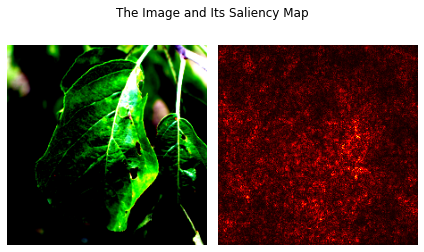

In [ ]:

saliency, _ = torch.max(image.grad.data.abs(), dim=1) 
saliency = saliency.reshape(224, 224)

image = image.reshape(-1, 224, 224)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image.cpu().detach().numpy().transpose(1, 2, 0))
ax[0].axis('off')
ax[1].imshow(saliency.cpu(), cmap='hot')
ax[1].axis('off')
plt.tight_layout()
fig.suptitle('The Image and Its Saliency Map')
plt.show()